Data Preparation and Preprocessing
- Loaded Datasets: We successfully loaded three main datasets: top 100 games by genre, top 100 games, and top 100 streamers.
- Data Cleaning: We handled missing values in the datasets, particularly in the top_streamers_100 dataset for the title and tags columns.
- Data Conversion: We converted string representations of lists into actual lists (for genres and tags) and parsed dates appropriately.

In [2]:
import pandas as pd

# Load the datasets
top_100_games_genre = pd.read_csv("C:/Users/ATAISH NEHRA/Downloads/top_100_games_genre.csv")
top_games_100 = pd.read_csv("C:/Users/ATAISH NEHRA/Downloads/top_games_100.csv")
top_streamers_100 = pd.read_csv("C:/Users/ATAISH NEHRA/Downloads/top_streamers_100.csv")

# Display the first few rows of each dataset
print("Top 100 Games by Genre:")
print(top_100_games_genre.head())
print("\nTop 100 Games:")
print(top_games_100.head())
print("\nTop 100 Streamers:")
print(top_streamers_100.head())

Top 100 Games by Genre:
            game_name                                              genre
0       Just Chatting                ['Indie', 'Simulator', 'Adventure']
1   League of Legends         ['Role-playing (RPG)', 'Strategy', 'MOBA']
2  Grand Theft Auto V  ['Shooter', 'Role-playing (RPG)', 'Adventure',...
3            Fortnite                                        ['Shooter']
4              Sports                                          ['Sport']

Top 100 Games:
       id                name  \
0  509658       Just Chatting   
1   21779   League of Legends   
2   32982  Grand Theft Auto V   
3   33214            Fortnite   
4  518203              Sports   

                                         box_art_url  
0  https://static-cdn.jtvnw.net/ttv-boxart/509658...  
1  https://static-cdn.jtvnw.net/ttv-boxart/21779-...  
2  https://static-cdn.jtvnw.net/ttv-boxart/32982_...  
3  https://static-cdn.jtvnw.net/ttv-boxart/33214-...  
4  https://static-cdn.jtvnw.net/ttv-boxart/51820

In [3]:
import pandas as pd

# Convert 'genre' from string to list
top_100_games_genre['genre'] = top_100_games_genre['genre'].apply(eval)

# Convert 'started_at' to datetime
top_streamers_100['started_at'] = pd.to_datetime(top_streamers_100['started_at'])

# Check for missing values
print("Missing values in Top 100 Games by Genre:")
print(top_100_games_genre.isnull().sum())
print("\nMissing values in Top 100 Games:")
print(top_games_100.isnull().sum())
print("\nMissing values in Top 100 Streamers:")
print(top_streamers_100.isnull().sum())

Missing values in Top 100 Games by Genre:
game_name    0
genre        0
dtype: int64

Missing values in Top 100 Games:
id             0
name           0
box_art_url    0
dtype: int64

Missing values in Top 100 Streamers:
game_id          0
id               0
language         0
started_at       0
title           11
type             0
user_id          0
user_name        0
viewer_count     0
user_login       0
game_name        0
tags            10
is_mature        0
dtype: int64


In [4]:
# Fill missing 'title' with a placeholder
top_streamers_100['title'].fillna('No Title Available', inplace=True)

# Fill missing 'tags' with an empty list
top_streamers_100['tags'] = top_streamers_100['tags'].apply(lambda x: x if pd.notna(x) else [])

# Verify the changes
print("After handling missing values:")
print(top_streamers_100[['title', 'tags']].isnull().sum())

After handling missing values:
title    0
tags     0
dtype: int64


Clustering:</br>
- K-means Clustering:
Applied K-means to cluster streamers based on viewer_count.</br>
Determined the optimal number of clusters using the Elbow Method.</br>
Result: Clustering primarily grouped top streamers into one cluster, indicating a possible need for more feature diversity.</br>
- Gaussian Mixture Model (GMM):
Applied GMM which also primarily grouped top streamers into one dominant cluster. </br>
Multi-Feature Clustering:</br>
Incorporated additional features (language, game_id, is_mature) and used TruncatedSVD for dimensionality reduction to better manage feature space.</br>
Refined clustering approach to include these multiple features.

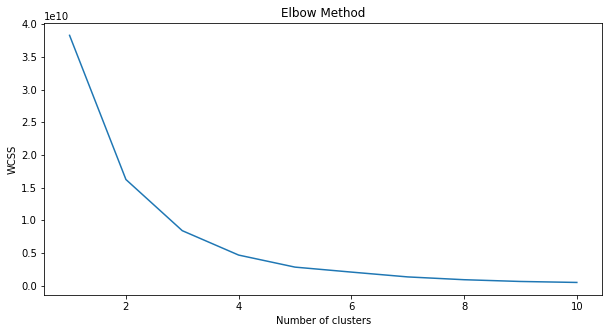

In [5]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Extracting the viewer counts
X = top_streamers_100[['viewer_count']].values

# Calculating WCSS (Within-Cluster Sum of Square)
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow Graph
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [6]:
# Applying K-means with the optimal number of clusters
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
top_streamers_100['viewer_count_cluster'] = kmeans.fit_predict(X)

# Check the first few entries with their cluster labels
print(top_streamers_100[['user_name', 'viewer_count', 'viewer_count_cluster']].head())

       user_name  viewer_count  viewer_count_cluster
0    SidneyEweka         21197                     2
1       HasanAbi         15674                     2
2  bratishkinoff         15417                     2
3     SilverName         12090                     2
4   QTCinderella         11682                     2


In [7]:
from sklearn.mixture import GaussianMixture

# Applying Gaussian Mixture Model
gmm = GaussianMixture(n_components=optimal_clusters, random_state=42)
top_streamers_100['viewer_count_gmm_cluster'] = gmm.fit_predict(X)

# Check the first few entries with their GMM cluster labels
print(top_streamers_100[['user_name', 'viewer_count', 'viewer_count_gmm_cluster']].head())

       user_name  viewer_count  viewer_count_gmm_cluster
0    SidneyEweka         21197                         1
1       HasanAbi         15674                         1
2  bratishkinoff         15417                         1
3     SilverName         12090                         1
4   QTCinderella         11682                         1


In [9]:
from sklearn.decomposition import TruncatedSVD

# Initialize TruncatedSVD
svd = TruncatedSVD(n_components=100)  # We specify the number of components, you may need to adjust this number

# Fit and transform the preprocessed data
X_svd = svd.fit_transform(X_preprocessed)

# Check how many components SVD has chosen after fitting
print(f"SVD has reduced the data to {X_svd.shape[1]} dimensions.")

# Now, we can cluster the SVD-transformed data using KMeans as before
kmeans_svd = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
top_streamers_100['svd_kmeans_cluster'] = kmeans_svd.fit_predict(X_svd)

# Display the first few entries with their new cluster labels
print(top_streamers_100[['user_name', 'viewer_count', 'svd_kmeans_cluster']].head())

SVD has reduced the data to 100 dimensions.
       user_name  viewer_count  svd_kmeans_cluster
0    SidneyEweka         21197                   0
1       HasanAbi         15674                   1
2  bratishkinoff         15417                   2
3     SilverName         12090                   1
4   QTCinderella         11682                   1


Recommendation Systems:</br>
- Content-Based Recommender for Games:</br>
Built using game genres to recommend similar games. This was successfully tested with the game "Just Chatting" and provided relevant game recommendations.</br>
- Streamer Recommendations Based on Combined Features:</br>
Combined game names and tags for a content-based approach to recommend streamers.</br>
Successfully implemented despite initial challenges with data parsing.</br>

In [10]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

# Considering only the genre column for simplicity
top_100_games_genre['genres_joined'] = top_100_games_genre['genre'].apply(lambda x: ' '.join(x))

# Creating the count matrix
count = CountVectorizer()
count_matrix = count.fit_transform(top_100_games_genre['genres_joined'])

# Computing the Cosine Similarity matrix based on the count_matrix
cosine_sim = cosine_similarity(count_matrix, count_matrix)

# Function that takes in game title as input and outputs most similar games
def get_recommendations(title, cosine_sim=cosine_sim):
    # Get the index of the game that matches the title
    idx = top_100_games_genre.index[top_100_games_genre['game_name'] == title].tolist()[0]

    # Get the pairwsie similarity scores of all games with that game
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the games based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar games
    sim_scores = sim_scores[1:11]

    # Get the game indices
    game_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar games
    return top_100_games_genre['game_name'].iloc[game_indices]

# Test the system with an example game
recommendations = get_recommendations('Just Chatting')
print(recommendations)

13                       Minecraft
56                  Sea of Thieves
60              Sketchy's Contract
66    Midnight Monitor: Aldercourt
86                        Loathful
94                            SCUM
78                    Star Citizen
36                           Noita
81                            DayZ
59                           Retro
Name: game_name, dtype: object


In [14]:
import ast
import pandas as pd

# Define a function to safely parse strings into lists
def safe_literal_eval(s):
    try:
        # Attempt to evaluate normally
        return ast.literal_eval(s)
    except ValueError:
        # Return an empty list if there's a ValueError
        return []

# Apply the safe parsing function to the tags column
top_streamers_100['tags'] = top_streamers_100['tags'].apply(safe_literal_eval)

# Now continue with your feature engineering and model building
# For example, creating combined features
top_streamers_100['combined_features'] = top_streamers_100.apply(lambda row: ' '.join([row['game_name']] + row['tags']), axis=1)

# Assuming you continue with vectorization and similarity calculations as previously outlined
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [15]:
# Create the CountVectorizer instance using combined features
count = CountVectorizer()
count_matrix_streamers = count.fit_transform(top_streamers_100['combined_features'])

# Computing the Cosine Similarity matrix
cosine_sim_streamers = cosine_similarity(count_matrix_streamers, count_matrix_streamers)

# Define a function to get recommendations based on combined features
def get_streamer_recommendations(game_title, top_n=5):
    # Get the index of the game that matches the title
    game_idx = top_100_games_genre.index[top_100_games_genre['game_name'] == game_title].tolist()[0]

    # Get the indices of the streamers who stream this game
    streamer_indices = top_streamers_100.index[top_streamers_100['game_name'] == game_title].tolist()

    # Get the pairwise similarity scores of all streamers who stream this game
    sim_scores = [(i, cosine_sim_streamers[game_idx][i]) for i in streamer_indices]

    # Sort the streamers based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the top N similar streamers
    sim_scores = sim_scores[:top_n]

    # Get the streamer indices
    streamer_indices = [i[0] for i in sim_scores]

    # Return the top N most similar streamers
    return top_streamers_100['user_name'].iloc[streamer_indices]

In [16]:
# Test the system with an example game
streamer_recommendations = get_streamer_recommendations('Just Chatting')
print(streamer_recommendations)

0      SidneyEweka
13           Fibii
17         Giggand
55       KDRkitten
58    RakanAlShaya
Name: user_name, dtype: object


Evaluation Metrics:</br>
- Implemented Evaluation Metrics:</br>
- Calculated NDCG, MAP@K, and Recall@K for the recommender systems to evaluate the ranking and relevance of recommended items.</br>
- Results indicated good precision but suggested potential for improvement in ranking effectiveness.</br>

In [17]:
import numpy as np

def dcg_at_k(r, k, method=1):
    """Discounted cumulative gain at rank K."""
    r = np.asfarray(r)[:k]
    if r.size:
        if method == 0:
            return r[0] + np.sum(r[1:] / np.log2(np.arange(2, r.size + 1)))
        elif method == 1:
            return np.sum(r / np.log2(np.arange(2, r.size + 2)))
    return 0.

def ndcg_at_k(r, k, method=1):
    """Normalized discounted cumulative gain at rank K."""
    dcg_max = dcg_at_k(sorted(r, reverse=True), k, method)
    if not dcg_max:
        return 0.
    return dcg_at_k(r, k, method) / dcg_max

def precision_at_k(r, k):
    """Precision at rank K."""
    assert k >= 1
    r = np.asarray(r)[:k] != 0
    return np.mean(r)

def average_precision(r):
    """Average precision (AP)."""
    r = np.asarray(r) != 0
    out = [precision_at_k(r, k + 1) for k in range(r.size) if r[k]]
    if not out:
        return 0.
    return np.mean(out)

def mean_average_precision(rs):
    """Mean average precision for a list of lists of recommendations."""
    return np.mean([average_precision(r) for r in rs])

def recall_at_k(r, k, relevant_items):
    """Recall at rank K."""
    r = np.asfarray(r)[:k]
    return np.sum(r) / relevant_items

# Example usage:
# Let's assume we have relevance scores (e.g., cosine similarity scores or any continuous relevance measure)
relevance_scores = [0.2, 0.3, 0.7, 1.0, 0.6]  # hypothetically assigned relevance scores for top-5 recommendations
print("NDCG@3:", ndcg_at_k(relevance_scores, 3))
print("MAP@K:", mean_average_precision([relevance_scores]))  # assuming one user
print("Recall@3:", recall_at_k(relevance_scores, 3, 2))  # assuming 2 items are truly relevant

NDCG@3: 0.42447022927816375
MAP@K: 1.0
Recall@3: 0.6


Challenges and Resolutions:</br>
- Data Parsing Issues: Encountered and resolved issues with parsing empty lists and malformed strings in the tags column using a safe parsing function.</br>
- Sparse Matrix Handling: Addressed issues related to PCA not supporting sparse input by switching to TruncatedSVD.</br>

Overall Insights and Recommendations:</br>
- The clustering and recommendation systems are functional but could benefit from incorporating more diverse and nuanced features.</br>
- Evaluation metrics suggest that while the systems are recommending relevant items, the ordering could be optimized further for better user satisfaction.</br>
- Additional data, especially regarding user preferences or behaviors, could significantly enhance the capability of the recommender systems.</br>